### <span style="color:lightblue">Loading Libraries and Data</span>



In [3]:
import re       # for regular expressions
import nltk     # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

### <span style="color:lightblue">Data Inspection</span>



##### <span style="color:white">Non Racist/Sexist tweets</span>



In [4]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


##### <span style="color:white">Racist/Sexist tweets</span>



In [5]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


##### <span style="color:white">Dimension of the dataset</span>



In [6]:
train.shape, test.shape

((31962, 3), (17197, 2))

##### <span style="color:white">Label Distribution</span>



In [8]:
train["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

### <span style="color:lightblue">Data Cleaning</span>



##### <span style="color:white">Combining the Dataset</span>



In [10]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49159, 3)

##### <span style="color:white">Removing unwanted text patterns from the tweets</span>



In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

       
#Removing Short Words       
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))       

combi.head()


<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kisha\AppData\Local\Temp\ipykernel_16428\3494914543.py:9: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


##### <span style="color:white">Text Normalization</span>



In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())        #tokenizing

tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

#Now let’s stitch these tokens
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet



### <span style="color:lightblue">Story Generation and Visualization from Tweets</span>




##### <span style="color:white">Common words used in the tweets</span>

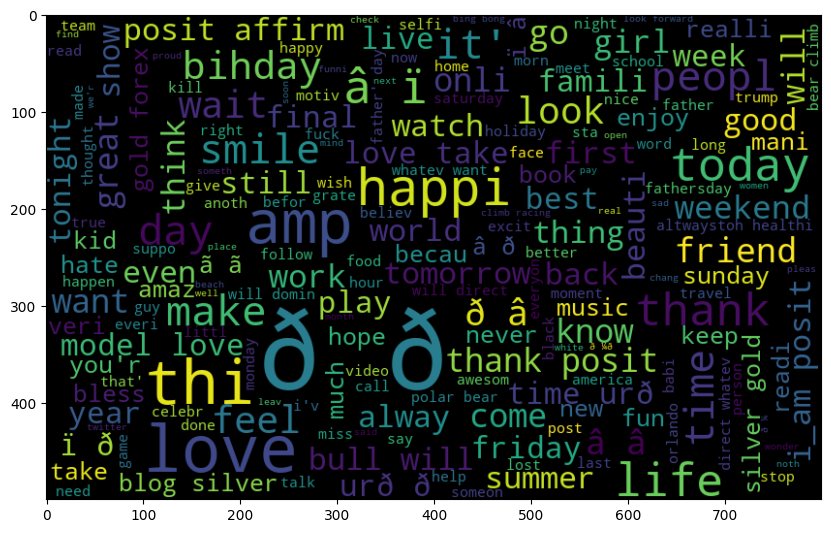

In [15]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

##### <span style="color:white">Words in non racist/sexist tweets</span>

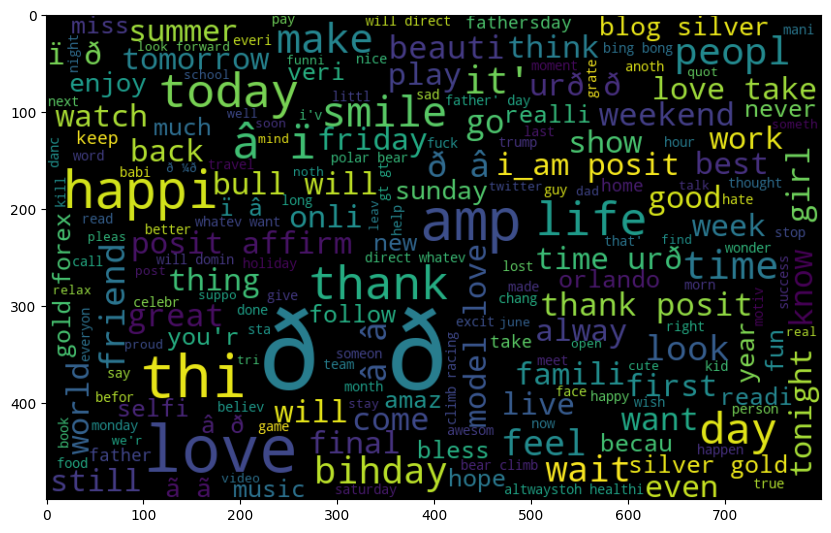

In [16]:
#Words in non racist/sexist tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")


##### <span style="color:white">Words in racist/sexist tweets</span>

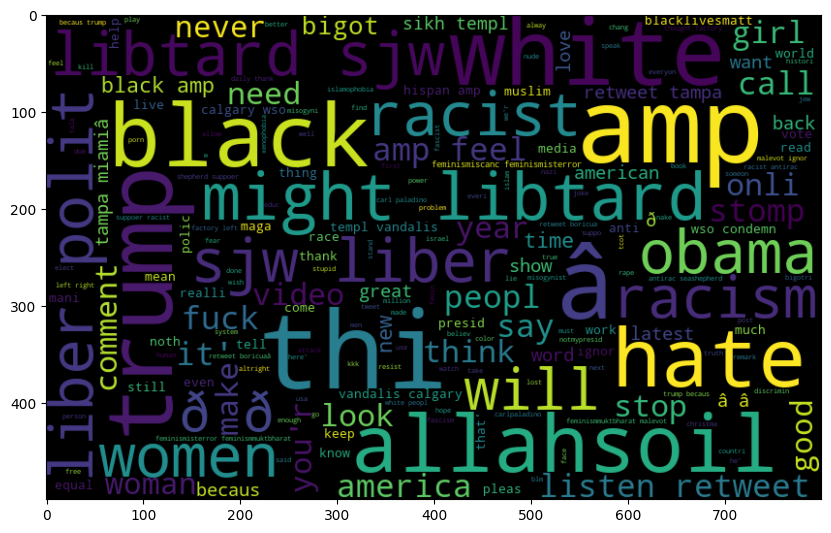

In [17]:
#Racist/Sexist Tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

##### <span style="color:white">Hashtags on tweets sentiment</span>

In [19]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])



##### <span style="color:white">Hashtags on Non-Racist/Sexist Tweets</span>

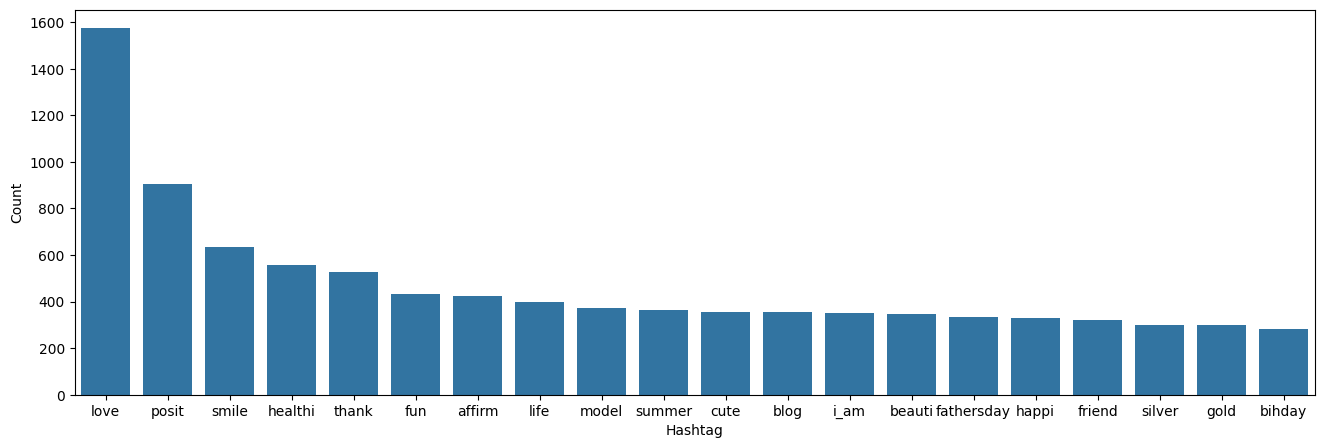

In [23]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")


##### <span style="color:white">Hashtags on Racist/Sexist Tweets</span>

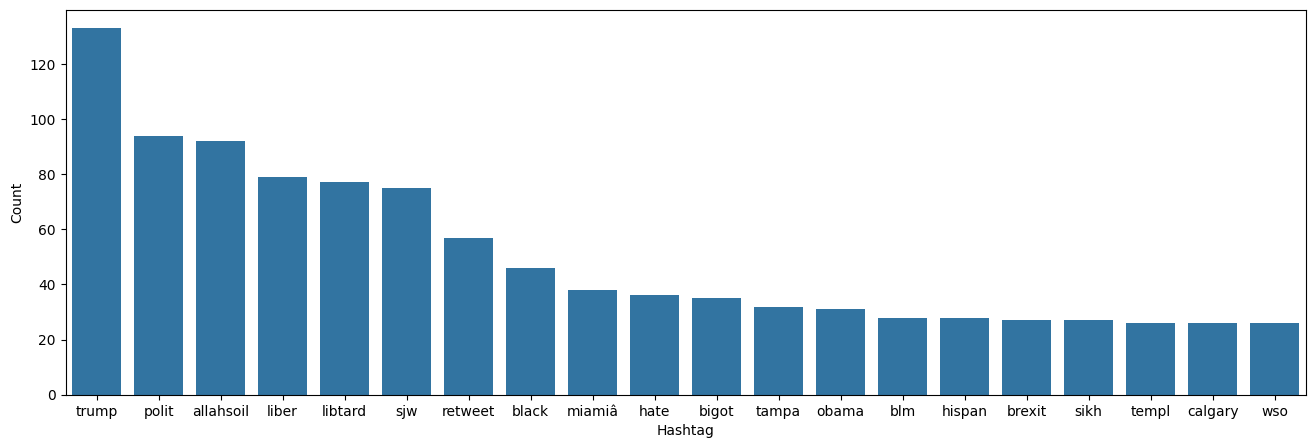

In [22]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")


### <span style="color:lightblue">Bag-of-Words Features</span>




In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

### <span style="color:lightblue">TF-IDF Features</span>




In [25]:
#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape


(49159, 1000)

### <span style="color:lightblue">Modelling</span>




##### <span style="color:white">Building a LogisticRegression model using Bag-of-Words features</span>

In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Splitting the bag-of-words feature matrix
train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

# Splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(
    train_bow, train['label'], test_size=0.3, random_state=42
)

# Training logistic regression model
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

# Prediction on validation set
prediction = lreg.predict_proba(xvalid_bow)[:, 1]  # Get probability scores
prediction_int = (prediction >= 0.3).astype(int)  # Convert probabilities to binary values

# Compute F1 Score
f1 = f1_score(yvalid, prediction_int)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(yvalid, prediction_int)
print("Confusion Matrix:\n", cm)

# Prediction on test set
prediction_test = lreg.predict_proba(test_bow)[:, 1]  # Get probability scores
prediction_test = (prediction_test >= 0.3).astype(int)  # Convert probabilities to binary values


F1 Score: 0.5464926590538336
Confusion Matrix:
 [[8698  207]
 [ 349  335]]


##### <span style="color:white">Building a LogisticRegression model using TF-IDF features</span>

In [39]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Splitting the TF-IDF feature matrix
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]


# Splitting data into training and validation set
xtrain_tfidf = train_tfidf[ytrain.index]  # Use the correct train indices
xvalid_tfidf = train_tfidf[yvalid.index]  # Use the correct validation indices

# Training logistic regression model
lreg.fit(xtrain_tfidf, ytrain)

# Prediction on validation set
prediction2 = lreg.predict_proba(xvalid_tfidf)[:, 1]  # Get probability scores
prediction_int2 = (prediction2 >= 0.3).astype(int)  # Convert probabilities to binary values

# Compute F1 Score
f1 = f1_score(yvalid, prediction_int2)
print("F1 Score:", f1)

# Prediction on test set using TF-IDF (Fixed)
prediction_test = lreg.predict_proba(test_tfidf)[:, 1]  # Get probability scores
prediction_test = (prediction_test >= 0.3).astype(int)  # Convert probabilities to binary values


F1 Score: 0.5415224913494809


##### <span style="color:white">Building a Random Forest model using Bag-of-Words features</span>

In [41]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=1024, criterion='entropy', random_state=0)

# Train the model
rf.fit(xtrain_bow, ytrain)

# Predict probabilities on validation set
predict_valid = rf.predict_proba(xvalid_bow)[:, 1]  # Extract positive class probabilities

# Apply threshold
valid_predict_int = (predict_valid >= 0.3).astype(int)  # Convert to binary labels

# Compute F1 Score
f1 = f1_score(yvalid, valid_predict_int)
print("F1 Score:", f1)


F1 Score: 0.5149342891278376


##### <span style="color:white">Building a Random Forest model using TF-IDF features</span>

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=128, criterion='entropy', random_state=0)

# Train the model
rf.fit(xtrain_tfidf, ytrain)

# Predict probabilities on validation set
predict_valid = rf.predict_proba(xvalid_tfidf)[:, 1]  # Extract positive class probabilities

# Apply threshold
valid_predict_int = (predict_valid >= 0.3).astype(int)  # Convert to binary labels

# Compute F1 Score
f1 = f1_score(yvalid, valid_predict_int)
print("F1 Score:", f1)  

# Predict on test set
test_pred = rf.predict_proba(test_tfidf)[:, 1]  # Extract positive class probabilities
test_pred_int = (test_pred >= 0.3).astype(int)  # Convert to binary labels


F1 Score: 0.5712132629992465
